In [65]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sbs
import datetime
import pymc as pm
import statsmodels.api as sm
from scipy.stats.stats import pearsonr
from pandas.tseries.offsets import BDay
import matplotlib as mpl
pd.options.display.max_columns = 50

In [2]:
import pickle
def save_obj(obj, name):
    with open('C:/Users/pc/Desktop/SG_project/Pickled/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
        
def load_obj(name):
    with open('C:/Users/pc/Desktop/SG_project/Pickled/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [3]:
dictionary_commodities = load_obj("dictionary_commodities")
dictionary_financials = load_obj("dictionary_financials")

In [4]:
dictionary_commodities.keys()

dict_keys(['CORN - CHICAGO BOARD OF TRADE', 'OATS - CHICAGO BOARD OF TRADE', 'COTTON NO. 2 - ICE FUTURES U.S.', 'ROUGH RICE - CHICAGO BOARD OF TRADE', 'LEAN HOGS - CHICAGO MERCANTILE EXCHANGE', 'LIVE CATTLE - CHICAGO MERCANTILE EXCHANGE', 'FEEDER CATTLE - CHICAGO MERCANTILE EXCHANGE', 'SOYBEANS - CHICAGO BOARD OF TRADE', 'SOYBEAN OIL - CHICAGO BOARD OF TRADE', 'SOYBEAN MEAL - CHICAGO BOARD OF TRADE', 'COCOA - ICE FUTURES U.S.', 'SUGAR NO. 11 - ICE FUTURES U.S.', 'COFFEE C - ICE FUTURES U.S.', 'CRUDE OIL, LIGHT SWEET - NEW YORK MERCANTILE EXCHANGE', 'GOLD - COMMODITY EXCHANGE INC.', 'NATURAL GAS - NEW YORK MERCANTILE EXCHANGE', 'NATURAL GAS ICE HENRY HUB - ICE FUTURES ENERGY DIV', 'COPPER-GRADE #1 - COMMODITY EXCHANGE INC.', 'FRZN CONCENTRATED ORANGE JUICE - ICE FUTURES U.S.'])

In [379]:
dictionary_commodities["CORN - CHICAGO BOARD OF TRADE"].isnull().sum()

Market_and_Exchange_Names        0
CFTC_Contract_Market_Code        0
CFTC_Market_Code                 0
CFTC_Commodity_Code              0
Open_Interest_All                0
Prod_Merc_Positions_Long_ALL     0
Prod_Merc_Positions_Short_ALL    0
Swap_Positions_Long_All          0
Swap__Positions_Short_All        0
Swap__Positions_Spread_All       0
M_Money_Positions_Long_ALL       0
M_Money_Positions_Short_ALL      0
M_Money_Positions_Spread_ALL     0
Tot_Rept_Positions_Long_All      0
Tot_Rept_Positions_Short_All     0
Change_in_Open_Interest_All      0
Change_in_M_Money_Long_All       0
Change_in_M_Money_Short_All      0
Change_in_M_Money_Spread_All     0
Pct_of_OI_M_Money_Long_All       0
Pct_of_OI_M_Money_Short_All      0
Pct_of_OI_M_Money_Spread_All     0
Traders_Prod_Merc_Long_All       0
Traders_Prod_Merc_Short_All      0
Traders_Swap_Long_All            0
Traders_Swap_Short_All           0
Traders_Swap_Spread_All          0
Traders_M_Money_Long_All         0
Traders_M_Money_Shor

In [380]:
df.columns

Index(['snp_futeres_price', 'vix_futeres_price', 'yen_futeres_price',
       'two_years_us_yield', 'five_years_us_yield', 'ten_years_us_yield',
       'euro_dollar_futeres_price', 'wheat_hrw_futeres_price',
       'live_cattle_futeres_price', 'feeder_cattle_futeres_price',
       'gold_futeres_price', 'coffee_futeres_price',
       'nut_gas_ice_futeres_price', 'nut_gas_nymex_futeres_price',
       'crude_oil_ls_futeres_price', 'soybean_oil_futeres_price',
       'corn_futeres_price', 'frzn_orange_juice_futures_price',
       'sugar_futures_price', 'copper_futures_price',
       'two_tnote_futeres_price', 'five_tnote_futeres_price',
       'ten_tnote_futeres_price', 'SG_CTA'],
      dtype='object')

In [5]:
dictionary_financials.keys()

dict_keys(['E-MINI S&P 500 STOCK INDEX - CHICAGO MERCANTILE EXCHANGE', 'VIX FUTURES - CBOE FUTURES EXCHANGE', 'EURO FX - CHICAGO MERCANTILE EXCHANGE', '3-MONTH EURODOLLARS - CHICAGO MERCANTILE EXCHANGE', 'BRITISH POUND STERLING - CHICAGO MERCANTILE EXCHANGE', 'JAPANESE YEN - CHICAGO MERCANTILE EXCHANGE', '2-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE', '10-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE', '5-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE', 'CANADIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE'])

In [6]:
df = load_obj("df_generic1_prices")
df.head()

,snp_futeres_price,vix_futeres_price,yen_futeres_price,two_years_us_yield,five_years_us_yield,ten_years_us_yield,euro_dollar_futeres_price,wheat_hrw_futeres_price,live_cattle_futeres_price,feeder_cattle_futeres_price,gold_futeres_price,coffee_futeres_price,nut_gas_ice_futeres_price,nut_gas_nymex_futeres_price,crude_oil_ls_futeres_price,soybean_oil_futeres_price,corn_futeres_price,frzn_orange_juice_futures_price,sugar_futures_price,copper_futures_price,two_tnote_futeres_price,five_tnote_futeres_price,ten_tnote_futeres_price,SG_CTA
2010-10-01,1142.25,24.75,120.07,0.4145,1.2565,2.5097,95.845,689.25,95.950,111.800,1316.1,181.10,46.76,3.797,81.58,43.49,465.75,155.65,23.36,369.05,109.757812,120.906250,126.078125,2010.976434
2010-10-04,1134.75,25.15,120.03,0.4066,1.2241,2.4758,95.890,683.00,95.100,110.500,1315.4,172.50,46.38,3.727,81.47,43.10,471.50,154.65,22.99,366.40,109.773438,121.093750,126.468750,2005.892686
2010-10-05,1154.75,23.65,120.28,0.3987,1.1917,2.4722,95.875,701.00,95.550,109.550,1338.9,177.00,47.12,3.743,82.82,43.47,491.00,158.50,23.74,372.65,109.773438,121.187500,126.640625,2030.601272
2010-10-06,1155.75,23.25,120.65,0.3829,1.1593,2.3976,95.925,697.50,94.850,109.200,1346.4,175.55,46.77,3.865,83.23,43.44,488.50,150.45,23.54,375.30,109.828125,121.359375,127.093750,2041.925935
2010-10-07,1156.50,22.95,121.52,0.3512,1.1270,2.3833,95.925,699.50,95.125,108.925,1333.9,173.45,46.54,3.617,81.67,43.79,498.25,151.20,25.16,367.95,109.882812,121.484375,127.140625,2042.460920


In [174]:
df.isnull().sum()

snp_futeres_price                   0
vix_futeres_price                   0
yen_futeres_price                   0
two_years_us_yield                  0
five_years_us_yield                 0
ten_years_us_yield                  0
euro_dollar_futeres_price           0
wheat_hrw_futeres_price             0
live_cattle_futeres_price           0
feeder_cattle_futeres_price         0
gold_futeres_price                  0
coffee_futeres_price                0
nut_gas_ice_futeres_price           0
nut_gas_nymex_futeres_price         0
crude_oil_ls_futeres_price          0
soybean_oil_futeres_price           0
corn_futeres_price                  0
frzn_orange_juice_futures_price     0
sugar_futures_price                 0
copper_futures_price                0
two_tnote_futeres_price             0
five_tnote_futeres_price            0
ten_tnote_futeres_price             0
SG_CTA                             14
dtype: int64

In [7]:
def get_change_bool(df):
    # create difference column
    df = pd.DataFrame(df)
    df["change"] = df - df.shift(1)
    # drop first row because nan is now present in the "change" column 
    df.drop(df.index[0], inplace=True)
    df["change_bool"] = 0
    # mark days with positive or no change as 0
    # mark days with negative change as 1
    
    df.loc[df["change"] < 0, "change_bool"] = 1
    # crop the data to the same time period as cftc data
    start = load_obj("cftc_index")[0]; end = load_obj("cftc_index")[-1]
    df = df.loc[start:end]
    return df

In [8]:
def get_neg_ret(df):
    df = get_change_bool(df)
    # parameter "n" is the number of consecutive days with negative return
    # column consec_day represents for how many consecutive days there was a decline 
    # column neg_return represents negative cumultive sum 
    if not isinstance(df, pd.DataFrame):
        df = pd.DataFrame(df)
    
    df["cumsum_bool"] = df['change_bool'].cumsum() 
    df["consec_days"] = df['cumsum_bool'].sub(df['cumsum_bool'].mask(df['change_bool'] != 0).ffill(), 
                                        fill_value=0).astype(int)  
    
    df["cumsum_bool_ret"] = df['change'].cumsum() 
    df["neg_return_cum"] = df['cumsum_bool_ret'].sub(df['cumsum_bool_ret'].mask(df['change_bool'] != 0).ffill(), 
                                        fill_value=0) 

    df.drop(["cumsum_bool_ret", 'cumsum_bool', 'change_bool'], 1, inplace=True)

    df["pct_neg_ret_cum"] = round(df["neg_return_cum"]/df[df.columns[0]] * 100, 4)
    df["pct_ret"] = round(df["change"]/df[df.columns[0]] * 100, 4)
    
    return df

In [9]:
def get_neg_df(df, n):
    from pandas.tseries.offsets import BDay
    df = get_neg_ret(df)
    df_return = pd.DataFrame()
    #ranges_list = []
    for index in df[df['consec_days'] == n].index:
        # index is the last day in the sequence 
        start = index - BDay(n-1)
        df_return = pd.concat([df_return, df.loc[start:index]])
        #ranges_list.append([start, index])
    return df_return#, ranges_list 

In [328]:
def map_neg_ret(df_positions, df, n):
    #   
    #   performing a lot of arithmetic to dates, going to check for holidays, othersiwe will not be able to index df
    #   will try to index range within 2 days before and after holiday
    #
    #
    #   class USTradingCalendar is taken from 
    #   https://stackoverflow.com/questions/33094297/create-trading-holiday-calendar-with-pandas      // Pierre Boutquin
    #
    ##############################################################################
    from pandas.tseries.offsets import BDay
    import datetime as dt
    from pandas.tseries.holiday import AbstractHolidayCalendar, Holiday, nearest_workday, \
        USMartinLutherKingJr, USPresidentsDay, GoodFriday, USMemorialDay, \
        USLaborDay, USThanksgivingDay

    class USTradingCalendar(AbstractHolidayCalendar):
        rules = [
            Holiday('NewYearsDay', month=1, day=1, observance=nearest_workday),
            USMartinLutherKingJr,
            USPresidentsDay,
            GoodFriday,
            USMemorialDay,
            Holiday('USIndependenceDay', month=7, day=4, observance=nearest_workday),
            USLaborDay,
            USThanksgivingDay,
            Holiday('Christmas', month=12, day=25, observance=nearest_workday)
        ]

    def get_trading_close_holidays(year):
        inst = USTradingCalendar()

        return inst.holidays(dt.datetime(year-1, 12, 31), dt.datetime(year, 12, 31))

    if __name__ == '__main__':
        pass    
    ##############################################################################
    neg_df = get_neg_df(df, n)
    
    
    df_return = neg_df
    df_return["position_change"] = 0
    # 0: Monday, 6: Sunday 
    mondays = neg_df.index[neg_df.index.dayofweek == 0]
    tuesdays = neg_df.index[neg_df.index.dayofweek == 1]
    fridays = neg_df.index[neg_df.index.dayofweek == 4]
    
    
    for tuesday in tuesdays:
        year = int(tuesday.year)
        if tuesday in get_trading_close_holidays(year):
            try:
                tuesday = tuesday - BDay(1)
                df_return.loc[tuesday, "position_change"] = df_positions.loc[tuesday]
            except:
                try:
                    tuesday = tuesday + BDay(1)
                    df_return.loc[tuesday, "position_change"] = df_positions.loc[tuesday]
                except:
                    try:
                        tuesday = tuesday - BDay(2)
                        df_return.loc[tuesday, "position_change"] = df_positions.loc[tuesday]
                    except:
                        tuesday = tuesday + BDay(2)
                        df_return.loc[tuesday, "position_change"] = df_positions.loc[tuesday]
        else:
            df_return.loc[tuesday, "position_change"] = df_positions.loc[tuesday]
    
    for monday in mondays:
        
        tuesday = monday + BDay(1)
        year = int(tuesday.year)
        if tuesday in get_trading_close_holidays(year):
            print("HHHHHHHOOOOOOliday MONDAY")
            print(tuesday)
            # find a day which will work 
            try:
                tuesday = tuesday - BDay(1)
                df_return.loc[tuesday, "position_change"] = df_positions.loc[tuesday]
            except:
                try:
                    tuesday = tuesday + BDay(1)
                    df_return.loc[tuesday, "position_change"] = df_positions.loc[tuesday]
                except:
                    try:
                        tuesday = tuesday - BDay(2)
                        df_return.loc[tuesday, "position_change"] = df_positions.loc[tuesday]
                    except:
                        tuesday = tuesday + BDay(2)
                        df_return.loc[tuesday, "position_change"] = df_positions.loc[tuesday]

            
            df_return.loc[tuesday, df_return.columns[0]] = df.loc[tuesday]
            tuesday_ret = df.loc[tuesday] - df.loc[df.index[df.index.get_loc(tuesday)-1]]
            tuesday_ret_pct = tuesday_ret/df.loc[tuesday]*100
#             print("pct tuesday",tuesday_ret_pct)
#             print("tueday",tuesday_ret)
            df_return.loc[tuesday, "change"] = tuesday_ret

            if pd.isnull(df_return.loc[tuesday, "consec_days"]):
                df_return.sort_index(inplace=True)
#                 print("NANANANAN MMMMMMMMMMMMM")
#                 print("SSSSSSSSSSSSSSSSSSSSSSSS", df_return["neg_return_cum"]\
#                                     .loc[df_return.index[df_return.index.get_loc(tuesday)-1]])
#                 print("IIIIIIIIIIIIIIII", df_return.index[df_return.index.get_loc(tuesday)-1])
                
                df_return.loc[tuesday, "neg_return_cum"] = df_return["neg_return_cum"]\
                                    .loc[df_return.index[df_return.index.get_loc(tuesday)-1]]
                df_return.loc[tuesday, "pct_neg_ret_cum"] = df_return["pct_neg_ret_cum"]\
                                    .loc[df_return.index[df_return.index.get_loc(tuesday)-1]]
                consec_days = df_return["consec_days"].loc[df_return.index[df_return.index.get_loc(tuesday)-1]]
                print("consec days",consec_days)
                if df_return.loc[monday, "consec_days"] == n:
#                     print("ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ")
                    df_return.loc[tuesday, "neg_return_cum"] = df_return.loc[tuesday, "neg_return_cum"]\
                                    + tuesday_ret
                    df_return.loc[tuesday, "pct_neg_ret_cum"] = df_return.loc[tuesday, "pct_neg_ret_cum"]\
                                    + tuesday_ret_pct
                if tuesday_ret < 0:
                    consec_days += 1
                
                df_return.loc[tuesday, "consec_days"] = consec_days.astype(int)
                df_return.loc[tuesday, "pct_ret"] = tuesday_ret_pct

            
            
        else:
            
            
            
            
            df_return.loc[tuesday, df_return.columns[0]] = df.loc[tuesday]
            tuesday_ret = df.loc[tuesday] - df.loc[df.index[df.index.get_loc(tuesday)-1]]
            tuesday_ret_pct = tuesday_ret/df.loc[tuesday]*100
#             print("pct tuesday",tuesday_ret_pct)
#             print("tueday",tuesday_ret)
            df_return.loc[tuesday, "change"] = tuesday_ret

            if pd.isnull(df_return.loc[tuesday, "consec_days"]):
                df_return.sort_index(inplace=True)
#                 print("NANANANAN MMMMMMMMMMMMM")
#                 print("SSSSSSSSSSSSSSSSSSSSSSSS", df_return["neg_return_cum"]\
#                                     .loc[df_return.index[df_return.index.get_loc(tuesday)-1]])
#                 print("IIIIIIIIIIIIIIII", df_return.index[df_return.index.get_loc(tuesday)-1])
                
                df_return.loc[tuesday, "neg_return_cum"] = df_return["neg_return_cum"]\
                                    .loc[df_return.index[df_return.index.get_loc(tuesday)-1]]
                df_return.loc[tuesday, "pct_neg_ret_cum"] = df_return["pct_neg_ret_cum"]\
                                    .loc[df_return.index[df_return.index.get_loc(tuesday)-1]]
                consec_days = df_return["consec_days"].loc[df_return.index[df_return.index.get_loc(tuesday)-1]]
#                 print("consec days",consec_days)
                if df_return.loc[monday, "consec_days"] == n:
#                     print("ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ")
                    df_return.loc[tuesday, "neg_return_cum"] = df_return.loc[tuesday, "neg_return_cum"]\
                                    + tuesday_ret
                    df_return.loc[tuesday, "pct_neg_ret_cum"] = df_return.loc[tuesday, "pct_neg_ret_cum"]\
                                    + tuesday_ret_pct
                if tuesday_ret < 0:
                    consec_days += 1
                
                df_return.loc[tuesday, "consec_days"] = consec_days.astype(int)
                df_return.loc[tuesday, "pct_ret"] = tuesday_ret_pct

            
                        
            

    
    for friday in fridays:
        tuesday = friday + BDay(2)
        year = int(tuesday.year)
        if tuesday in get_trading_close_holidays(year):
            # find a day which will work 
            try:
                tuesday = tuesday - BDay(1)
                df_return.loc[tuesday, "position_change"] = df_positions.loc[tuesday]
            except:
                try:
                    tuesday = tuesday + BDay(1)
                    df_return.loc[tuesday, "position_change"] = df_positions.loc[tuesday]
                except:
                    try:
                        tuesday = tuesday - BDay(2)
                        df_return.loc[tuesday, "position_change"] = df_positions.loc[tuesday]
                    except:
                        tuesday = tuesday + BDay(2)
                        df_return.loc[tuesday, "position_change"] = df_positions.loc[tuesday]

            ############################################################
            df_return.loc[tuesday, df_return.columns[0]] = df.loc[tuesday]
            monday_ret = df.loc[df.index[df.index.get_loc(tuesday)-1]] - df.loc[df.index[df.index.get_loc(tuesday)-2]]
            monday_ret_pct = monday_ret/df.loc[tuesday]*100
            print("pct monday",monday_ret_pct)
            print("monday ",monday_ret)
            tuesday_ret = df.loc[tuesday] - df.loc[df.index[df.index.get_loc(tuesday)-1]]
            tuesday_ret_pct = tuesday_ret/df.loc[tuesday]*100
            print("pct tuesday",tuesday_ret_pct)
            print("tueday",tuesday_ret)
            df_return.loc[tuesday, "change"] = tuesday_ret

            if pd.isnull(df_return.loc[tuesday, "consec_days"]):
                df_return.sort_index(inplace=True)
                print("NANANANAN")
                print("SSSSSSSSSSSSSSSSSSSSSSSS", df_return["neg_return_cum"]\
                                    .loc[df_return.index[df_return.index.get_loc(tuesday)-1]])
                print("IIIIIIIIIIIIIIII", df_return.index[df_return.index.get_loc(tuesday)-1])
                
                df_return.loc[tuesday, "neg_return_cum"] = df_return["neg_return_cum"]\
                                    .loc[df_return.index[df_return.index.get_loc(tuesday)-1]]
                df_return.loc[tuesday, "pct_neg_ret_cum"] = df_return["pct_neg_ret_cum"]\
                                    .loc[df_return.index[df_return.index.get_loc(tuesday)-1]]
                consec_days = df_return["consec_days"].loc[df_return.index[df_return.index.get_loc(tuesday)-1]]
                print("consec days",consec_days)
                if df_return.loc[friday, "consec_days"] == n:
                    print("SSSSSSSSSS")
                    df_return.loc[tuesday, "neg_return_cum"] = df_return.loc[tuesday, "neg_return_cum"]\
                                    + monday_ret
                    df_return.loc[tuesday, "pct_neg_ret_cum"] = df_return.loc[tuesday, "pct_neg_ret_cum"]\
                                    + monday_ret_pct
                    if monday_ret < 0:
                        consec_days += 1
                if tuesday_ret < 0:
                    consec_days += 1
                
                
                df_return.loc[tuesday, "consec_days"] = consec_days.astype(int)
                df_return.loc[tuesday, "pct_ret"] = monday_ret_pct
                df_return.loc[tuesday, "neg_return_cum"] = df_return.loc[tuesday, "neg_return_cum"]\
                                    + tuesday_ret
                print("pct monday",monday_ret_pct)
                df_return.loc[tuesday, "pct_neg_ret_cum"] = df_return.loc[tuesday, "pct_neg_ret_cum"]\
                                    + tuesday_ret_pct
            #########################################################################

                        
        else:
            df_return.loc[tuesday, "position_change"] = df_positions.loc[tuesday]
            df_return.loc[tuesday, df_return.columns[0]] = df.loc[tuesday]
            monday_ret = df.loc[df.index[df.index.get_loc(tuesday)-1]] - df.loc[df.index[df.index.get_loc(tuesday)-2]]
            monday_ret_pct = monday_ret/df.loc[tuesday]*100
            #print("pct monday",monday_ret_pct)
            #print("monday ",monday_ret)
            tuesday_ret = df.loc[tuesday] - df.loc[df.index[df.index.get_loc(tuesday)-1]]
            tuesday_ret_pct = tuesday_ret/df.loc[tuesday]*100
            #print("pct tuesday",tuesday_ret_pct)
            #print("tueday",tuesday_ret)
            df_return.loc[tuesday, "change"] = tuesday_ret

            if pd.isnull(df_return.loc[tuesday, "consec_days"]):
                df_return.sort_index(inplace=True)
                #print("NANANANAN")
                #print("SSSSSSSSSSSSSSSSSSSSSSSS", df_return["neg_return_cum"]\
                                    #.loc[df_return.index[df_return.index.get_loc(tuesday)-1]])
                #print("IIIIIIIIIIIIIIII", df_return.index[df_return.index.get_loc(tuesday)-1])
                
                df_return.loc[tuesday, "neg_return_cum"] = df_return["neg_return_cum"]\
                                    .loc[df_return.index[df_return.index.get_loc(tuesday)-1]]
                df_return.loc[tuesday, "pct_neg_ret_cum"] = df_return["pct_neg_ret_cum"]\
                                    .loc[df_return.index[df_return.index.get_loc(tuesday)-1]]
                consec_days = df_return["consec_days"].loc[df_return.index[df_return.index.get_loc(tuesday)-1]]
                #print("consec days",consec_days)
                if df_return.loc[friday, "consec_days"] == n:
                    #print("SSSSSSSSSS")
                    df_return.loc[tuesday, "neg_return_cum"] = df_return.loc[tuesday, "neg_return_cum"]\
                                    + monday_ret
                    df_return.loc[tuesday, "pct_neg_ret_cum"] = df_return.loc[tuesday, "pct_neg_ret_cum"]\
                                    + monday_ret_pct
                    if monday_ret < 0:
                        consec_days += 1
                if tuesday_ret < 0:
                    consec_days += 1
                
                
                df_return.loc[tuesday, "consec_days"] = consec_days.astype(int)
                df_return.loc[tuesday, "pct_ret"] = monday_ret_pct
                df_return.loc[tuesday, "neg_return_cum"] = df_return.loc[tuesday, "neg_return_cum"]\
                                    + tuesday_ret
                #print("pct monday",monday_ret_pct)
                df_return.loc[tuesday, "pct_neg_ret_cum"] = df_return.loc[tuesday, "pct_neg_ret_cum"]\
                                    + tuesday_ret_pct
            
            

 
    df_return.sort_index(inplace=True)
    df_return["pct_neg_ret_cum"] = df_return["pct_neg_ret_cum"].round(3)
    df_return["pct_ret"] = df_return["pct_ret"].round(3)
    df_return["consec_days"] = df_return["consec_days"].astype(int) 
    return df_return

In [367]:
snp_8 = map_neg_ret(dictionary_financials["E-MINI S&P 500 STOCK INDEX - CHICAGO MERCANTILE EXCHANGE"]\
['Change_in_Net_Positioning_Asset_Mgr'], df["snp_futeres_price"], 5)
snp_8

HHHHHHHOOOOOOliday MONDAY
2012-12-25 00:00:00
pct monday -0.838880084522
monday  -11.91
pct tuesday -0.974819510477
tueday -13.84


,snp_futeres_price,change,consec_days,neg_return_cum,pct_neg_ret_cum,pct_ret,position_change
2011-05-02,1357.75,-2.00,1,-2.00,-0.147,-0.147,0.0
2011-05-03,1352.00,-5.75,2,-7.75,-0.573,-0.425,-9665.0
2011-05-04,1343.00,-9.00,3,-16.75,-1.247,-0.670,0.0
2011-05-05,1335.00,-8.00,4,-24.75,-1.854,-0.599,0.0
2011-05-06,1334.50,-0.50,5,-25.25,-1.892,-0.038,0.0
2011-05-10,1353.75,11.00,5,-6.00,-0.470,0.609,34549.0
2011-07-22,1341.00,-1.50,1,-1.50,-0.112,-0.112,0.0
2011-07-25,1333.50,-7.50,2,-9.00,-0.675,-0.562,0.0
2011-07-26,1326.25,-7.25,3,-16.25,-1.225,-0.547,54724.0
2011-07-27,1299.00,-27.25,4,-43.50,-3.349,-2.098,0.0


In [341]:
# snp_8.loc['2012-12']

In [340]:
# snp_8.loc['2012-12']

In [342]:
# dictionary_financials["E-MINI S&P 500 STOCK INDEX - CHICAGO MERCANTILE EXCHANGE"]["Asset_Mgr_Positions_Long_All"].loc["2018"].plot()

In [372]:
snp_8[snp_8["position_change"]!=0]

,snp_futeres_price,change,consec_days,neg_return_cum,pct_neg_ret_cum,pct_ret,position_change
2011-05-03,1352.00,-5.75,2,-7.75,-0.573,-0.425,-9665.0
2011-05-10,1353.75,11.00,5,-6.00,-0.470,0.609,34549.0
2011-07-26,1326.25,-7.25,3,-16.25,-1.225,-0.547,54724.0
2011-08-16,1192.25,-6.25,1,-6.25,-0.524,-0.524,22172.0
2011-08-23,1158.50,35.25,5,-40.00,-3.657,3.043,-46640.0
2011-11-22,1182.75,-8.00,5,-71.25,-6.024,-0.676,-49560.0
2012-05-15,1328.25,-5.75,3,-29.25,-2.202,-0.433,-75823.0
2012-07-10,1335.50,-13.75,5,-32.50,-2.434,-1.030,-26015.0
2012-12-24,1419.75,-13.84,2,-25.75,-1.814,-0.975,90687.0
2013-09-24,1692.50,-0.25,4,-32.00,-1.891,-0.015,-30180.0


In [385]:
y = snp_8[snp_8["position_change"]!=0]["position_change"]
X = snp_8[snp_8["position_change"]!=0]["neg_return_cum"]
model = sm.OLS(y, X).fit()

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.523     
Dependent Variable: position_change  AIC:                588.7828  
Date:               2018-05-13 03:35 BIC:                589.9608  
No. Observations:   24               Log-Likelihood:     -293.39   
Df Model:           1                F-statistic:        27.34     
Df Residuals:       23               Prob (F-statistic): 2.65e-05  
R-squared:          0.543            Scale:              2.5363e+09
-------------------------------------------------------------------
                  Coef.   Std.Err.   t    P>|t|   [0.025    0.975] 
-------------------------------------------------------------------
neg_return_cum   930.7524 177.9990 5.2290 0.0000 562.5333 1298.9715
-------------------------------------------------------------------
Omnibus:                2.014        Durbin-Watson:           1.563
Prob(Omnibus):          0.365        Jarque-Bera (JB):        1.12

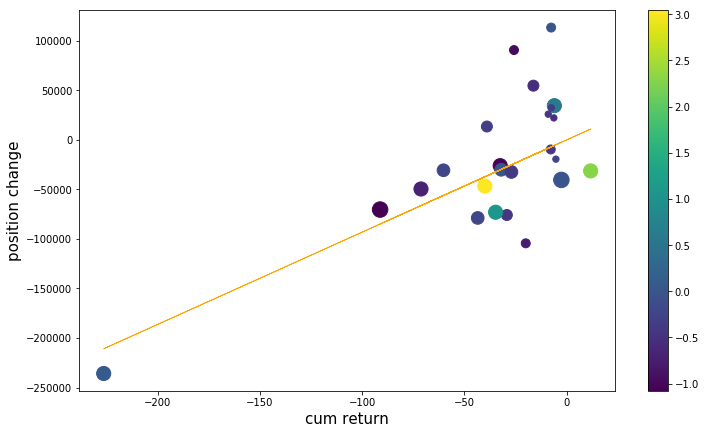

In [393]:
plt.figure(figsize=(12,7))
plt.scatter(snp_8[snp_8["position_change"]!=0]["neg_return_cum"],snp_8[snp_8["position_change"]!=0]["position_change"],
           s=snp_8[snp_8["position_change"]!=0]["consec_days"]*40, c=snp_8[snp_8["position_change"]!=0]["pct_ret"])
plt.plot(X, model.fittedvalues, color='orange', lw=.85)
plt.xlabel("cum return", fontsize=15)
plt.ylabel("position change", fontsize=15)
plt.colorbar()
print(model.summary2())

In [334]:
snp_8["neg_return_cum"][snp_8["neg_return_cum"] == snp_8["neg_return_cum"].min()]

2015-08-25   -226.5
Name: neg_return_cum, dtype: float64

In [382]:
corn = map_neg_ret(dictionary_commodities["CORN - CHICAGO BOARD OF TRADE"]["Change_in_Net_Positioning_MM"], 
                   df["corn_futeres_price"], 5)
corn

,corn_futeres_price,change,consec_days,neg_return_cum,pct_neg_ret_cum,pct_ret,position_change
2011-03-04,721.25,-8.50,1,-8.50,-1.178,-1.178,0.0
2011-03-07,710.75,-10.50,2,-19.00,-2.673,-1.477,0.0
2011-03-08,698.75,-12.00,3,-31.00,-4.436,-1.717,-23362.0
2011-03-09,695.00,-3.75,4,-34.75,-5.000,-0.540,0.0
2011-03-10,676.25,-18.75,5,-53.50,-7.911,-2.773,0.0
2011-06-13,782.50,-4.50,1,-4.50,-0.575,-0.575,0.0
2011-06-14,755.50,-27.00,2,-31.50,-4.169,-3.574,14773.0
2011-06-15,725.75,-29.75,3,-61.25,-8.440,-4.099,0.0
2011-06-16,701.50,-24.25,4,-85.50,-12.188,-3.457,0.0
2011-06-17,700.25,-1.25,5,-86.75,-12.388,-0.178,0.0


In [383]:
corn[corn["position_change"]!=0]

,corn_futeres_price,change,consec_days,neg_return_cum,pct_neg_ret_cum,pct_ret,position_change
2011-03-08,698.75,-12.000,3,-31.00,-4.436,-1.717,-23362.0
2011-06-14,755.50,-27.000,2,-31.50,-4.169,-3.574,14773.0
2011-06-21,707.50,7.000,5,-79.50,-11.364,0.035,-52917.0
2012-05-29,562.50,-8.000,2,-16.00,-2.844,-1.422,-44019.0
2012-06-05,567.50,-0.500,6,-11.00,-2.076,2.907,-21033.0
2012-08-28,789.50,-5.000,5,-41.75,-5.288,-0.633,-13770.0
2012-10-23,756.00,-5.250,2,-5.50,-0.728,-0.694,13531.0
2012-10-30,741.75,4.750,6,-19.75,-2.680,-0.101,-35692.0
2012-12-11,724.25,-2.500,4,-29.00,-4.004,-0.345,-42457.0
2013-02-05,729.00,-5.250,3,-11.50,-1.578,-0.720,17728.0


In [394]:
y = corn[corn["position_change"]!=0]["position_change"]
X = corn[corn["position_change"]!=0]["neg_return_cum"]
model = sm.OLS(y, X).fit()

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.380     
Dependent Variable: position_change  AIC:                1107.1279 
Date:               2018-05-13 03:36 BIC:                1108.9781 
No. Observations:   47               Log-Likelihood:     -552.56   
Df Model:           1                F-statistic:        29.81     
Df Residuals:       46               Prob (F-statistic): 1.85e-06  
R-squared:          0.393            Scale:              9.7407e+08
-------------------------------------------------------------------
                  Coef.   Std.Err.   t    P>|t|   [0.025    0.975] 
-------------------------------------------------------------------
neg_return_cum  1017.3115 186.3254 5.4599 0.0000 642.2579 1392.3651
-------------------------------------------------------------------
Omnibus:               2.181         Durbin-Watson:           1.300
Prob(Omnibus):         0.336         Jarque-Bera (JB):        1.68

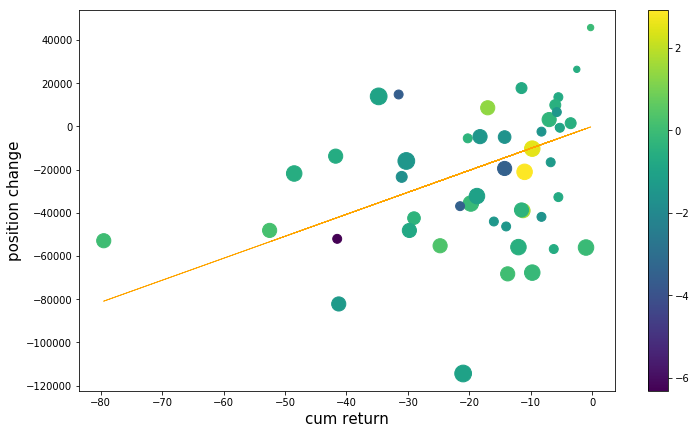

In [396]:
plt.figure(figsize=(12,7))
plt.scatter(corn[corn["position_change"]!=0]["neg_return_cum"],corn[corn["position_change"]!=0]["position_change"],
           s=corn[corn["position_change"]!=0]["consec_days"]*40, c=corn[corn["position_change"]!=0]["pct_ret"])
plt.plot(X, model.fittedvalues, color='orange', lw=.85)
plt.xlabel("cum return", fontsize=15)
plt.ylabel("position change", fontsize=15)
plt.colorbar()
print(model.summary2())

In [273]:
q= get_neg_df(df["snp_futeres_price"], 8)
q

,snp_futeres_price,change,consec_days,neg_return_cum,pct_neg_ret_cum,pct_ret
2011-07-22,1341.00,-1.50,1,-1.50,-0.1119,-0.1119
2011-07-25,1333.50,-7.50,2,-9.00,-0.6749,-0.5624
2011-07-26,1326.25,-7.25,3,-16.25,-1.2253,-0.5467
2011-07-27,1299.00,-27.25,4,-43.50,-3.3487,-2.0978
2011-07-28,1296.75,-2.25,5,-45.75,-3.5281,-0.1735
2011-07-29,1288.50,-8.25,6,-54.00,-4.1909,-0.6403
2011-08-01,1279.75,-8.75,7,-62.75,-4.9033,-0.6837
2011-08-02,1247.25,-32.50,8,-95.25,-7.6368,-2.6057
2011-11-16,1231.00,-23.00,1,-23.00,-1.8684,-1.8684
2011-11-17,1214.75,-16.25,2,-39.25,-3.2311,-1.3377


In [275]:
e= get_neg_df(df["five_tnote_futeres_price"], 8)
e

,five_tnote_futeres_price,change,consec_days,neg_return_cum,pct_neg_ret_cum,pct_ret
2011-03-17,118.968750,-0.179688,1,-0.179688,-0.1510,-0.1510
2011-03-18,118.828125,-0.140625,2,-0.320312,-0.2696,-0.1183
2011-03-21,118.476562,-0.351562,3,-0.671875,-0.5671,-0.2967
2011-03-22,118.367188,-0.109375,4,-0.781250,-0.6600,-0.0924
2011-03-23,118.304688,-0.062500,5,-0.843750,-0.7132,-0.0528
2011-03-24,118.023438,-0.281250,6,-1.125000,-0.9532,-0.2383
2011-03-25,117.750000,-0.273438,7,-1.398438,-1.1876,-0.2322
2011-03-28,117.648438,-0.101562,8,-1.500000,-1.2750,-0.0863
2015-10-28,120.054688,-0.554688,1,-0.554688,-0.4620,-0.4620
2015-10-29,119.781250,-0.273438,2,-0.828125,-0.6914,-0.2283


In [292]:
map_neg_ret(dictionary_financials["5-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE"]\
['Change_in_Net_Positioning_Lev_Money'],df["five_tnote_futeres_price"], 8)

pct tuesday -0.0924031417068
tueday -0.109375
pct tuesday -0.126329787234
tueday -0.1484375
NANANANAN MMMMMMMMMMMMM
SSSSSSSSSSSSSSSSSSSSSSSS -1.5
IIIIIIIIIIIIIIII 2011-03-28 00:00:00
consec days 8.0
ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ
pct tuesday -0.130830117093
tueday -0.15625
pct tuesday -0.187690117145
tueday -0.2265625
pct tuesday -0.124712832294
tueday -0.1484375
pct tuesday -0.144851198314
tueday -0.171875
pct tuesday -0.0396405919662
tueday -0.046875
FFFFF
2011-03-22 00:00:00
pct monday -0.297010098343
monday  -0.3515625
pct tuesday -0.0924031417068
tueday -0.109375
FFFFF
2011-03-29 00:00:00
pct monday -0.0864361702128
monday  -0.1015625
pct tuesday -0.126329787234
tueday -0.1484375
FFFFF
2015-11-03 00:00:00
pct monday -0.156996140512
monday  -0.1875
pct tuesday -0.130830117093
tueday -0.15625
FFFFF
2015-11-10 00:00:00
pct monday 0.0
monday  0.0
pct tuesday 0.170827858081
tueday 0.203125
NANANANAN
SSSSSSSSSSSSSSSSSSSSSSSS -1.90625
IIIIIIIIIIIIIIII 2015-11-0

,five_tnote_futeres_price,change,consec_days,neg_return_cum,pct_neg_ret_cum,pct_ret,position_change
2011-03-17,118.968750,-0.179688,1,-0.179688,-0.151,-0.151,0.0
2011-03-18,118.828125,-0.140625,2,-0.320312,-0.270,-0.118,0.0
2011-03-21,118.476562,-0.351562,3,-0.671875,-0.567,-0.297,0.0
2011-03-22,118.367188,-0.109375,4,-0.781250,-0.660,-0.092,5225.0
2011-03-23,118.304688,-0.062500,5,-0.843750,-0.713,-0.053,0.0
2011-03-24,118.023438,-0.281250,6,-1.125000,-0.953,-0.238,0.0
2011-03-25,117.750000,-0.273438,7,-1.398438,-1.188,-0.232,0.0
2011-03-28,117.648438,-0.101562,8,-1.500000,-1.275,-0.086,0.0
2011-03-29,117.500000,-0.148438,9,-1.648438,-1.401,-0.126,4986.0
2015-10-28,120.054688,-0.554688,1,-0.554688,-0.462,-0.462,0.0


In [13]:
def get_stats(df_positions, df, min_days, max_days):
    df_return = pd.DataFrame()
    for n in range(min_days, max_days+1):
        neg_df = get_neg_df(df, n)
        mapped_df = map_neg_ret(df_positions, neg_df, df)
        df_return = pd.concat([df_return, mapped_df])
    return df_return    

In [14]:
s = get_stats(dictionary_financials["VIX FUTURES - CBOE FUTURES EXCHANGE"]\
['Change_in_Net_Positioning_Lev_Money'], df["vix_futeres_price"], 8, 10)

In [15]:
s

,vix_futeres_price,change,consec_days,neg_return_cum,pct_neg_ret_cum,pct_ret,position_change
2013-06-25,19.450,-0.700,1.0,-0.700,-3.5990,-3.599000,14509.0
2013-06-26,18.850,-0.600,2.0,-1.300,-6.8966,-3.183000,0.0
2013-06-27,18.200,-0.650,3.0,-1.950,-10.7143,-3.571400,0.0
2013-06-28,18.050,-0.150,4.0,-2.100,-11.6343,-0.831000,0.0
2013-07-01,17.650,-0.400,5.0,-2.500,-14.1643,-2.266300,0.0
2013-07-02,17.600,-0.050,6.0,-2.550,-14.4886,-0.284091,-14258.0
2013-07-03,17.250,-0.350,7.0,-2.900,-16.8116,-2.029000,0.0
2013-07-04,16.600,-0.650,8.0,-3.550,-21.3855,-3.915700,0.0
2016-07-06,16.175,-0.650,1.0,-0.650,-4.0185,-4.018500,0.0
2016-07-07,15.925,-0.250,2.0,-0.900,-5.6515,-1.569900,0.0


In [22]:
s[s['position_change'] != 0]#.loc[s[s['position_change'] != 0].index.unique()]

,vix_futeres_price,change,consec_days,neg_return_cum,pct_neg_ret_cum,pct_ret,position_change
2013-06-25,19.450,-0.70,1.0,-0.700,-3.5990,-3.599000,14509.0
2013-07-02,17.600,-0.05,6.0,-2.550,-14.4886,-0.284091,-14258.0
2016-07-12,14.275,-0.35,5.0,-2.550,-17.8634,-2.451839,4300.0
2016-07-19,12.225,-0.85,NaN,NaN,NaN,-6.952965,-18557.0
2017-07-11,12.125,-0.10,3.0,-0.900,-7.4227,-0.824742,12308.0
2017-07-18,10.125,-0.15,8.0,-2.900,-28.6420,-1.481481,-17958.0
2017-11-21,11.625,-0.45,4.0,-1.425,-12.2581,-3.870968,33879.0
2017-11-28,11.275,-0.05,NaN,NaN,NaN,-0.443459,831.0
2013-06-25,19.450,-0.70,1.0,-0.700,-3.5990,-3.599000,14509.0
2013-07-02,17.600,-0.05,6.0,-2.550,-14.4886,-0.284091,-14258.0


In [21]:
s[s['position_change'] != 0].index.unique()

DatetimeIndex(['2013-06-25', '2013-07-02', '2016-07-12', '2016-07-19',
               '2017-07-11', '2017-07-18', '2017-11-21', '2017-11-28',
               '2013-07-09'],
              dtype='datetime64[ns]', freq=None)

In [17]:
s[s['position_change'] != 0]['pct_ret']

2013-06-25   -3.599000
2013-07-02   -0.284091
2016-07-12   -2.451839
2016-07-19   -6.952965
2017-07-11   -0.824742
2017-07-18   -1.481481
2017-11-21   -3.870968
2017-11-28   -0.443459
2013-06-25   -3.599000
2013-07-02   -0.284091
2013-07-09   -1.655629
2016-07-12   -2.451839
2016-07-19   -6.952965
2017-07-11   -0.824742
2017-07-18   -1.481481
2017-11-21   -3.870968
2017-11-28   -0.443459
2013-06-25   -3.599000
2013-07-02   -0.284091
2013-07-09   -1.655629
2016-07-12   -2.451839
2016-07-19   -6.952965
Name: pct_ret, dtype: float64